In [46]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import sys
print(sys.version)
sys.path.append('../')

from models.powertrain.bounded_powertrain import Bounded_powertrain
from models.kinematic.ideal_diff_drive import Ideal_diff_drive
from models.kinematic.ICR_based import *
from models.kinematic.Perturbed_unicycle import *
from models.kinematic.enhanced_kinematic import *

3.10.6 (main, Nov 14 2022, 16:10:14) [GCC 11.3.0]


In [47]:
# fetch model params

icr_symmetric_params = np.load('../eval/training_results/marmotte/icr_symmetrical/grand_salon_a/train_full_all_horizons.npy')
icr_asymmetric_params = np.load('../eval/training_results/marmotte/icr_asymmetrical/grand_salon_a/train_full_all_horizons.npy')

print(icr_symmetric_params)
print(icr_asymmetric_params)

[0.88132674 0.25476058]
[ 0.86301886  0.9109506   0.00417836  0.22434593 -0.28777154]


In [48]:
ideal_diff_drive_errors_dataframe = pd.read_pickle('../data/marmotte/eval_results/grand_salon_b/ideal_diff_drive_full_eval_metrics.pkl')
icr_symmetric_errors_dataframe = pd.read_pickle('../data/marmotte/eval_results/grand_salon_b/icr_symmetrical_full_eval_metrics.pkl')
icr_asymmetric_errors_dataframe = pd.read_pickle('../data/marmotte/eval_results/grand_salon_b/icr_asymmetrical_full_eval_metrics.pkl')

print(model_errors_dataframe)

    prediction_error_x prediction_error_y prediction_error_z  \
0            -0.544585           0.026801          -0.029545   
1            -0.294793          -0.305027          -0.000955   
2            -0.518743          -0.683964          -0.005299   
3            -0.036448           0.724497          -0.010085   
4            -0.313634           0.244789          -0.018844   
..                 ...                ...                ...   
410           0.310123           0.113596            0.00184   
411           0.283952           0.039836           0.022813   
412           0.400118           0.037835          -0.023371   
413          -0.253762          -0.341396           0.002197   
414          -0.221091           0.409797          -0.013359   

    prediction_error_roll prediction_error_pitch prediction_error_yaw  \
0                0.001423               0.002633             0.950506   
1               -0.000086               0.005125             0.941113   
2           

In [49]:
# fetch some stats

ideal_diff_drive_total_trans_error = ideal_diff_drive_errors_dataframe['prediction_error_3dof_trans'].sum()
ideal_diff_drive_total_ang_error = ideal_diff_drive_errors_dataframe['prediction_error_3dof_ang'].sum()
print('IDD total trans error [m] : ', ideal_diff_drive_total_trans_error)
print('IDD total ang error [rad] : ', ideal_diff_drive_total_ang_error)

icr_symmetric_total_trans_error = icr_symmetric_errors_dataframe['prediction_error_3dof_trans'].sum()
icr_symmetric_total_ang_error = icr_symmetric_errors_dataframe['prediction_error_3dof_ang'].sum()
print('ICR S total trans error [m] : ', icr_symmetric_total_trans_error)
print('ICR S total ang error [rad] : ', icr_symmetric_total_ang_error)

icr_asymmetric_total_trans_error = icr_asymmetric_errors_dataframe['prediction_error_3dof_trans'].sum()
icr_asymmetric_total_ang_error = icr_asymmetric_errors_dataframe['prediction_error_3dof_ang'].sum()
print('ICR AS total trans error [m] : ', icr_asymmetric_total_trans_error)
print('ICR AS total ang error [rad] : ', icr_asymmetric_total_ang_error)

IDD total trans error [m] :  114.42579005711852
IDD total ang error [rad] :  182.39684802654733
ICR S total trans error [m] :  118.21742625274095
ICR S total ang error [rad] :  171.29036945890712
ICR AS total trans error [m] :  114.89540248437564
ICR AS total ang error [rad] :  178.35717813941045


Text(0, 0.5, 'Angular error [rad]')

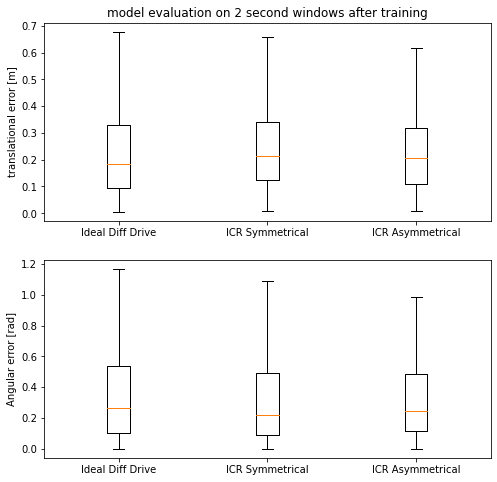

In [62]:
fig1, axs = plt.subplots(2, 1, figsize=(8, 8))

axs[0].boxplot(ideal_diff_drive_errors_dataframe['prediction_error_3dof_trans'], showfliers = False, positions =[0], labels=['Ideal Diff Drive'])
axs[0].boxplot(icr_symmetric_errors_dataframe['prediction_error_3dof_trans'], showfliers = False, positions =[1], labels=['ICR Symmetrical'])
axs[0].boxplot(icr_asymmetric_errors_dataframe['prediction_error_3dof_trans'], showfliers = False, positions =[2], labels=['ICR Asymmetrical'])
axs[0].set_title('model evaluation on 2 second windows after training')
axs[0].set_ylabel('translational error [m]')

axs[1].boxplot(ideal_diff_drive_errors_dataframe['prediction_error_3dof_ang'], showfliers = False, positions =[0], labels=['Ideal Diff Drive'])
axs[1].boxplot(icr_symmetric_errors_dataframe['prediction_error_3dof_ang'], showfliers = False, positions =[1], labels=['ICR Symmetrical'])
axs[1].boxplot(icr_asymmetric_errors_dataframe['prediction_error_3dof_ang'], showfliers = False, positions =[2], labels=['ICR Asymmetrical'])
axs[1].set_ylabel('Angular error [rad]')